# Pandas Tutorial

https://pandas.pydata.org/

"pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language."

## What kind of data does pandas handle?

"When working with tabular data, such as data stored in spreadsheets or databases, pandas is the right tool for you. pandas will help you to explore, clean, and process your data. In pandas, a data table is called a `DataFrame`."

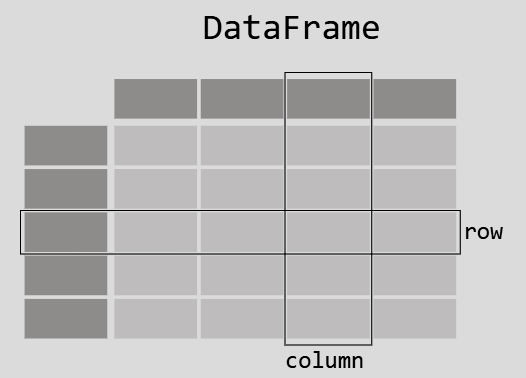

## How do I read and write tabular data?

"pandas supports the integration with many file formats or data sources out of the box (csv, excel, sql, json, parquet,…). Importing data from each of these data sources is provided by function with the prefix `read_*`. Similarly, the `to_*` methods are used to store data."

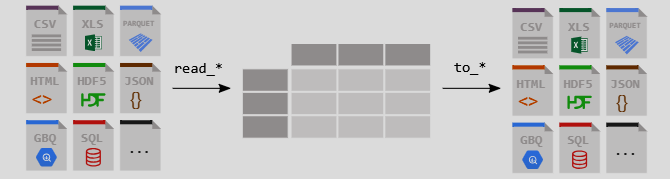

## How do I select a subset of a table?

"Selecting or filtering specific rows and/or columns? Filtering the data on a condition? Methods for slicing, selecting, and extracting the data you need are available in pandas."

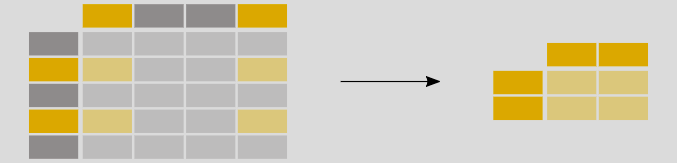

## How to create plots in pandas?

"pandas provides plotting your data out of the box, using the power of Matplotlib. You can pick the plot type (scatter, bar, boxplot,…) corresponding to your data."

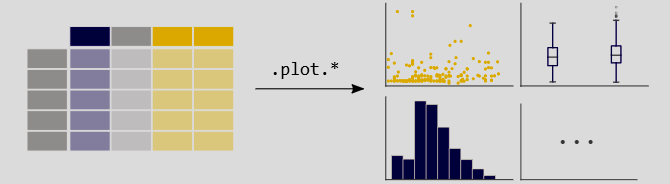

## How to create new columns derived from existing columns?

"There is no need to loop over all rows of your data table to do calculations. Data manipulations on a column work elementwise. Adding a column to a DataFrame based on existing data in other columns is straightforward."

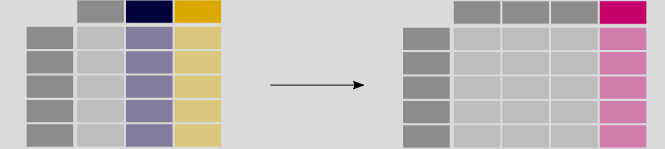

## How to calculate summary stats?

"Basic statistics (mean, median, min, max, counts…) are easily calculable. These or custom aggregations can be applied on the entire data set, a sliding window of the data, or grouped by categories. The latter is also known as the split-apply-combine approach."

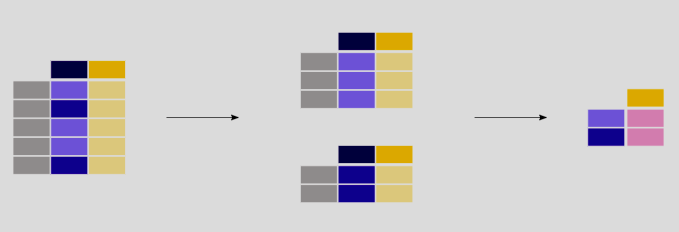

## How to reshape the layout of tables?

"Change the structure of your data table in multiple ways. You can melt() your data table from wide to long/tidy form or pivot() from long to wide format. With aggregations built-in, a pivot table is created with a single command."

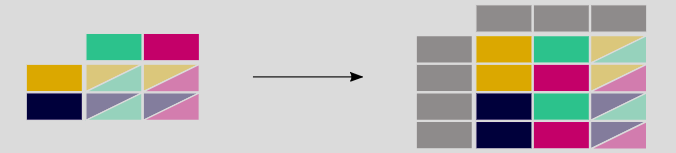

## How to combine data from multiple tables?

"Multiple tables can be concatenated both column wise and row wise as database-like join/merge operations are provided to combine multiple tables of data."

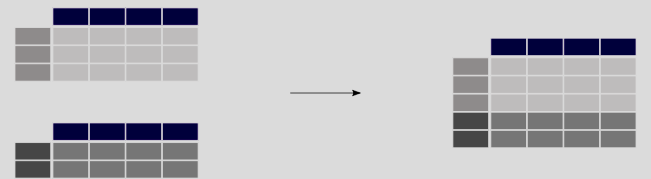

## How to handle time series data?

"pandas has great support for time series and has an extensive set of tools for working with dates, times, and time-indexed data."

## How to manipulate textual data?

"Data sets do not only contain numerical data. pandas provides a wide range of functions to clean textual data and extract useful information from it."

## 10 MINUTES INTRO TO PANDAS 🚀

In [1]:
import numpy as np
import pandas as pd

### Basic data structures in pandas

Pandas provides two types of classes for handling data:

1. `Series`: a one-dimensional labeled array holding data of any type, such as integers, strings, Python objects, etc..

2. `DataFrame`: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

### Object creation

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,0.378767,0.179239,0.463178,-0.041243
2013-01-02,-1.135330,0.764703,0.351900,-1.424368
2013-01-03,-0.213246,-0.802183,0.497740,1.240998
2013-01-04,-1.314085,0.336653,1.175077,-0.474632
2013-01-05,1.445276,0.685772,0.844178,0.359713
2013-01-06,-0.531444,-0.723485,0.777809,0.589496


In [7]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [9]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

### Viewing data

In [10]:
df.head()

,A,B,C,D
2013-01-01,0.378767,0.179239,0.463178,-0.041243
2013-01-02,-1.135330,0.764703,0.351900,-1.424368
2013-01-03,-0.213246,-0.802183,0.497740,1.240998
2013-01-04,-1.314085,0.336653,1.175077,-0.474632
2013-01-05,1.445276,0.685772,0.844178,0.359713


In [11]:
df.head(3)

,A,B,C,D
2013-01-01,0.378767,0.179239,0.463178,-0.041243
2013-01-02,-1.135330,0.764703,0.351900,-1.424368
2013-01-03,-0.213246,-0.802183,0.497740,1.240998


In [12]:
df.tail()

,A,B,C,D
2013-01-02,-1.135330,0.764703,0.351900,-1.424368
2013-01-03,-0.213246,-0.802183,0.497740,1.240998
2013-01-04,-1.314085,0.336653,1.175077,-0.474632
2013-01-05,1.445276,0.685772,0.844178,0.359713
2013-01-06,-0.531444,-0.723485,0.777809,0.589496


In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.to_numpy()

array([[ 0.37876714,  0.17923875,  0.46317788, -0.04124325],
       [-1.1353296 ,  0.76470296,  0.35189979, -1.42436816],
       [-0.21324643, -0.80218322,  0.49773975,  1.24099774],
       [-1.3140852 ,  0.33665348,  1.17507654, -0.47463165],
       [ 1.44527588,  0.68577182,  0.84417818,  0.3597125 ],
       [-0.53144443, -0.72348499,  0.77780942,  0.58949592]])

In [17]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

In [18]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [19]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.228344,0.073450,0.684980,0.041661
std,1.025977,0.683385,0.306383,0.923294
min,-1.314085,-0.802183,0.351900,-1.424368
25%,-0.984358,-0.497804,0.471818,-0.366285
50%,-0.372345,0.257946,0.637775,0.159235
75%,0.230764,0.598492,0.827586,0.532050
max,1.445276,0.764703,1.175077,1.240998


In [20]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.378767,-1.135330,-0.213246,-1.314085,1.445276,-0.531444
B,0.179239,0.764703,-0.802183,0.336653,0.685772,-0.723485
C,0.463178,0.351900,0.497740,1.175077,0.844178,0.777809
D,-0.041243,-1.424368,1.240998,-0.474632,0.359713,0.589496


In [24]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.041243,0.463178,0.179239,0.378767
2013-01-02,-1.424368,0.351900,0.764703,-1.135330
2013-01-03,1.240998,0.497740,-0.802183,-0.213246
2013-01-04,-0.474632,1.175077,0.336653,-1.314085
2013-01-05,0.359713,0.844178,0.685772,1.445276
2013-01-06,0.589496,0.777809,-0.723485,-0.531444


In [25]:
df.sort_values(by="B")

,A,B,C,D
2013-01-03,-0.213246,-0.802183,0.497740,1.240998
2013-01-06,-0.531444,-0.723485,0.777809,0.589496
2013-01-01,0.378767,0.179239,0.463178,-0.041243
2013-01-04,-1.314085,0.336653,1.175077,-0.474632
2013-01-05,1.445276,0.685772,0.844178,0.359713
2013-01-02,-1.135330,0.764703,0.351900,-1.424368


### Selection

In [27]:
df["A"]  # Passing a single label selects a column and yields a Series equivalent to df.A

2013-01-01    0.378767
2013-01-02   -1.135330
2013-01-03   -0.213246
2013-01-04   -1.314085
2013-01-05    1.445276
2013-01-06   -0.531444
Freq: D, Name: A, dtype: float64

In [29]:
df[0:3]  # Select matching rows

,A,B,C,D
2013-01-01,0.378767,0.179239,0.463178,-0.041243
2013-01-02,-1.135330,0.764703,0.351900,-1.424368
2013-01-03,-0.213246,-0.802183,0.497740,1.240998


In [30]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-1.135330,0.764703,0.351900,-1.424368
2013-01-03,-0.213246,-0.802183,0.497740,1.240998
2013-01-04,-1.314085,0.336653,1.175077,-0.474632


In [31]:
df.loc[dates[0]]

A    0.378767
B    0.179239
C    0.463178
D   -0.041243
Name: 2013-01-01 00:00:00, dtype: float64

In [32]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,0.378767,0.179239
2013-01-02,-1.135330,0.764703
2013-01-03,-0.213246,-0.802183
2013-01-04,-1.314085,0.336653
2013-01-05,1.445276,0.685772
2013-01-06,-0.531444,-0.723485


In [33]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-1.135330,0.764703
2013-01-03,-0.213246,-0.802183
2013-01-04,-1.314085,0.336653


In [34]:
df.loc[dates[0], "A"]

0.3787671387251611

In [35]:
df.at[dates[0], "A"]

0.3787671387251611

In [36]:
df.iloc[3]

A   -1.314085
B    0.336653
C    1.175077
D   -0.474632
Name: 2013-01-04 00:00:00, dtype: float64

In [37]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.314085,0.336653
2013-01-05,1.445276,0.685772


- **loc VS iloc**
    - .loc → think “labels”
    - .iloc → think “indices (integer positions)”

In [38]:
df = pd.DataFrame({
    "A": [10, 20, 30],
    "B": [40, 50, 60]
}, index=["x", "y", "z"])

In [39]:
df.loc["y", "A"]
# 20

20

In [40]:
df.iloc[1, 0]
# 20

20

In [42]:
df.iloc[1, 1]

50

In [43]:
df.iat[1, 1]

50

### Boolean indexing

In [44]:
df[df["A"] > 20]

,A,B
z,30,60


In [45]:
df[df > 0]

,A,B
x,10,40
y,20,50
z,30,60


In [46]:
df2 = df.copy()

In [47]:
df2['C'] = [70, 80, 90]

In [48]:
df2

,A,B,C
x,10,40,70
y,20,50,80
z,30,60,90


In [ ]:
df2[df2['C'].isin([80, 90])]  # filtering

,A,B,C
y,20,50,80
z,30,60,90


### Setting

In [50]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

In [51]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [52]:
df.at[dates[0], "A"] = 0

In [53]:
df.iat[0, 1] = 0

In [54]:
df.loc[:, "D"] = np.array([5] * len(df))

In [55]:
df

,A,B,D
x,10.0,0.0,5
y,20.0,50.0,5
z,30.0,60.0,5
2013-01-01 00:00:00,0.0,NaN,5


In [56]:
df2 = df.copy()

In [57]:
df2[df2 > 0] = -df2

In [58]:
df2

,A,B,D
x,-10.0,0.0,-5
y,-20.0,-50.0,-5
z,-30.0,-60.0,-5
2013-01-01 00:00:00,0.0,NaN,-5


### Missing data

In [2]:
import pandas as pd
import numpy as np

In [3]:
dates = pd.date_range("20130101", periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,0.425153,-1.138262,1.120739,1.127024
2013-01-02,0.802168,0.149319,-1.078116,0.517529
2013-01-03,-0.808478,0.787755,-0.619429,1.172430
2013-01-04,-0.758445,-0.526498,0.091277,-0.996310
2013-01-05,0.440655,0.307495,-0.223648,-1.413991
2013-01-06,0.156302,0.300661,-0.095984,-1.237773


In [4]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [5]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [6]:
df1

,A,B,C,D,E
2013-01-01,0.425153,-1.138262,1.120739,1.127024,1.0
2013-01-02,0.802168,0.149319,-1.078116,0.517529,1.0
2013-01-03,-0.808478,0.787755,-0.619429,1.172430,NaN
2013-01-04,-0.758445,-0.526498,0.091277,-0.996310,NaN


- `DataFrame.dropna()` drops any rows that have missing data.

In [7]:
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,0.425153,-1.138262,1.120739,1.127024,1.0
2013-01-02,0.802168,0.149319,-1.078116,0.517529,1.0


- `DataFrame.fillna()` fills missing data.

In [8]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.425153,-1.138262,1.120739,1.127024,1.0
2013-01-02,0.802168,0.149319,-1.078116,0.517529,1.0
2013-01-03,-0.808478,0.787755,-0.619429,1.172430,5.0
2013-01-04,-0.758445,-0.526498,0.091277,-0.996310,5.0


- `isna()` gets the boolean mask where values are `nan`.

In [9]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


### Operations

In [10]:
df.mean()

A    0.042893
B   -0.019922
C   -0.134193
D   -0.138515
dtype: float64

In [11]:
df.mean(axis=1)

2013-01-01    0.383663
2013-01-02    0.097725
2013-01-03    0.133070
2013-01-04   -0.547494
2013-01-05   -0.222372
2013-01-06   -0.219198
Freq: D, dtype: float64

In [12]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [13]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

### User defined functions

In [14]:
df.agg(lambda x: np.mean(x) * 5.6)

A    0.240198
B   -0.111562
C   -0.751483
D   -0.775684
dtype: float64

In [15]:
df.transform(lambda x: x * 101.2)

,A,B,C,D
2013-01-01,43.025486,-115.192163,113.418749,114.054791
2013-01-02,81.179404,15.111080,-109.105310,52.373949
2013-01-03,-81.817974,79.720810,-62.686224,118.649924
2013-01-04,-76.754670,-53.281639,9.237278,-100.826556
2013-01-05,44.594309,31.118490,-22.633166,-143.095844
2013-01-06,15.817790,30.426942,-9.713580,-125.262615


### Value counts

In [16]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    4
2    5
3    0
4    5
5    5
6    1
7    6
8    0
9    1
dtype: int32

In [17]:
s.value_counts()

5    4
0    2
1    2
4    1
6    1
Name: count, dtype: int64

### String methods

In [18]:
s =pd.Series(["Light weight BABYYY!!!", "AAAaaa", "ILOVEGYM", np.nan, "etc"])

In [19]:
s.str.lower()

0    light weight babyyy!!!
1                    aaaaaa
2                  ilovegym
3                       NaN
4                       etc
dtype: object

In [20]:
s.str.upper()

0    LIGHT WEIGHT BABYYY!!!
1                    AAAAAA
2                  ILOVEGYM
3                       NaN
4                       ETC
dtype: object

### Merge

- Concat

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame(np.random.randn(10, 4))

In [3]:
df

,0,1,2,3
0,-0.241633,0.981451,0.679493,-2.341299
1,-0.531498,0.969723,-2.179348,-0.824364
2,0.237436,-1.386766,-1.159186,-3.111557
3,0.857392,-0.926640,-0.897309,0.382565
4,0.472232,-0.725355,-1.497920,-1.391785
5,-0.101467,0.401680,1.565033,-0.504152
6,1.776416,-0.638301,-0.013278,2.126577
7,-1.539225,0.699830,-2.122219,-0.929915
8,0.595892,0.540692,-1.650351,0.078884
9,0.168841,-0.439391,1.527079,-2.177500


In [4]:
pieces = [df[:3], df[3:7], df[7:]]

In [5]:
pieces

[          0         1         2         3
 0 -0.241633  0.981451  0.679493 -2.341299
 1 -0.531498  0.969723 -2.179348 -0.824364
 2  0.237436 -1.386766 -1.159186 -3.111557,
           0         1         2         3
 3  0.857392 -0.926640 -0.897309  0.382565
 4  0.472232 -0.725355 -1.497920 -1.391785
 5 -0.101467  0.401680  1.565033 -0.504152
 6  1.776416 -0.638301 -0.013278  2.126577,
           0         1         2         3
 7 -1.539225  0.699830 -2.122219 -0.929915
 8  0.595892  0.540692 -1.650351  0.078884
 9  0.168841 -0.439391  1.527079 -2.177500]

In [6]:
pd.concat(pieces)

,0,1,2,3
0,-0.241633,0.981451,0.679493,-2.341299
1,-0.531498,0.969723,-2.179348,-0.824364
2,0.237436,-1.386766,-1.159186,-3.111557
3,0.857392,-0.926640,-0.897309,0.382565
4,0.472232,-0.725355,-1.497920,-1.391785
5,-0.101467,0.401680,1.565033,-0.504152
6,1.776416,-0.638301,-0.013278,2.126577
7,-1.539225,0.699830,-2.122219,-0.929915
8,0.595892,0.540692,-1.650351,0.078884
9,0.168841,-0.439391,1.527079,-2.177500


- Join

In [7]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [8]:
left

,key,lval
0,foo,1
1,foo,2


In [9]:
right

,key,rval
0,foo,4
1,foo,5


In [10]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [11]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [12]:
left

,key,lval
0,foo,1
1,bar,2


In [13]:
right

,key,rval
0,foo,4
1,bar,5


In [14]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Grouping

In [15]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [16]:
df

,A,B,C,D
0,foo,one,-0.289453,-1.089689
1,bar,one,0.176119,-1.260098
2,foo,two,-0.644425,-1.535102
3,bar,three,-0.247672,1.687233
4,foo,two,-0.676234,2.182329
5,bar,two,-0.514361,-1.411333
6,foo,one,-0.757046,0.311207
7,foo,three,-0.414218,-0.146490


In [17]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-0.585914,-0.984198
foo,-2.781377,-0.277745


In [20]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.176119 -1.260098
    three -0.247672  1.687233
    two   -0.514361 -1.411333
foo one   -1.046499 -0.778481
    three -0.414218 -0.146490
    two   -1.320660  0.647227

### Reshaping

- Stack

In [21]:
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]

In [22]:
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

In [23]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [24]:
df2 = df[:4]

In [25]:
df2

A         B
first second                    
bar   one     0.386494 -0.152128
      two    -0.381268 -0.500711
baz   one     0.264806  1.639380
      two     0.384439  0.193298

In [26]:
stacked = df2.stack(future_stack=True)

In [27]:
stacked

first  second   
bar    one     A    0.386494
               B   -0.152128
       two     A   -0.381268
               B   -0.500711
baz    one     A    0.264806
               B    1.639380
       two     A    0.384439
               B    0.193298
dtype: float64

In [28]:
stacked.unstack()

A         B
first second                    
bar   one     0.386494 -0.152128
      two    -0.381268 -0.500711
baz   one     0.264806  1.639380
      two     0.384439  0.193298

In [29]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.386494 -0.381268
      B -0.152128 -0.500711
baz   A  0.264806  0.384439
      B  1.639380  0.193298

In [30]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.386494  0.264806
       B -0.152128  1.639380
two    A -0.381268  0.384439
       B -0.500711  0.193298